Assignment 2 - T2 2022
Demonstrative Example Number: Deep Learning Technique Name - Problem Name: **CNN** with Cat Dog dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\ABES\Dhanesh Project\PROJECT 3\train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Executive Summary: The Dogs vs Cats dataset has been downloaded from the Kaggle website. The dataset contains a set of images of cats and dogs. Our main aim here is for the model to learn through CNN layers, flattern layer and dense layer. Features of cat and dog. Once the training of the model is done it will be able to differentiate images of cat and dog.

## 1. Data Description


*   It's Image dataset RGB format, that is 3 dimension data
*   Images can be trained for extracting different features. 
# **Creating 3 Important Lists** 
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether dog or cat



# **Let's Import Required Libraries**

In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# **One Hot Encoding the Target Classes**

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Dog
# 1 - Cat

OneHotEncoder()

In [ ]:
# This cell updates result list for images with Dog

data = []
paths = []
result = []

for r, d, f in os.walk(r'D:\ABES\Dhanesh Project\PROJECT 3\train\dog'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images with cat

paths = []
for r, d, f in os.walk(r"D:\ABES\Dhanesh Project\PROJECT 3\train\cat"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

## 2. Data Preprocessing
Data set images are being carried out through array and then reshape into 2 dimensional format, 20 percent data is for Testing and rest is for Training.

In [ ]:
data = np.array(data)
data.shape

(4136, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(4136,2)

# **Splitting the Data into Training & Testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## 3. Model Construction


# **Model Building**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(3308, 2)

## 4. Model Execution
This section is to provide code to fit the models.

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
83/83 [==============================] - 109s 1s/step - loss: 6.8991 - val_loss: 0.7948
Epoch 2/10
83/83 [==============================] - 104s 1s/step - loss: 0.6931 - val_loss: 0.6934
Epoch 3/10
83/83 [==============================] - 103s 1s/step - loss: 0.5995 - val_loss: 0.7842
Epoch 4/10
83/83 [==============================] - 104s 1s/step - loss: 0.5351 - val_loss: 0.8327
Epoch 5/10
83/83 [==============================] - 104s 1s/step - loss: 0.4946 - val_loss: 0.8749
Epoch 6/10
83/83 [==============================] - 103s 1s/step - loss: 0.4586 - val_loss: 1.0385
Epoch 7/10
83/83 [==============================] - 104s 1s/step - loss: 0.4134 - val_loss: 0.9272
Epoch 8/10
83/83 [==============================] - 104s 1s/step - loss: 0.3762 - val_loss: 0.9527
Epoch 9/10
83/83 [==============================] - 104s 1s/step - loss: 0.3422 - val_loss: 1.0198
Epoch 10/10
83/83 [==============================] - 104s 1s/step - loss: 0.3140 - val_loss: 1.0244


## 5. Experiments Report
the following graph depicting the test versus validation graph, as more as ephocs will be increased, graph will show more accuracy, but upto certain levels.

Explain the meaning of your result and how your model can be used to address the related business problem.

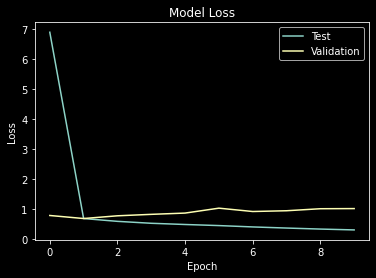

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Dog'
    else:
        return 'Its a Cat'

99.815434217453% Confidence This Is Its a Cat


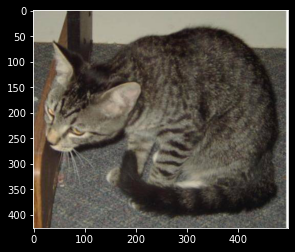

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\ABES\Dhanesh Project\PROJECT 3\train\cat\cat.35.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

98.92734885215759% Confidence This Is A Its a Dog


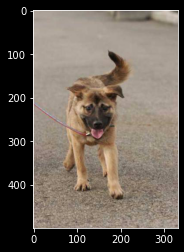

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\ABES\Dhanesh Project\PROJECT 3\train\dog\dog.3471.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))